In [8]:
import matplotlib.pyplot as plt
import numpy as np
import itertools

### find intersection point of 2 lines

In [2]:
def intersect(L1, L2):
    flag = [False]*2
    A1,B1,C1 = L1[0],L1[1],L1[2]
    A2,B2,C2 = L2[0],L2[1],L2[2]
    print('line 1: %d x + %d y = %d'%(A1,B1,C1))
    print('line 2: %d x + %d y = %d'%(A2,B2,C2))
    #A1x + B1y = C1, A2x + B2y = C2
    det = A1*B2 - A2*B1
    if det==0: #parallel lines, no intersection point
        return (-9999,9999)
    else:
        x = (B2*C1 - B1*C2)/det
        if not x.is_integer():
            x1 = format(x, '.2f') #limit decimal to 2 places
            flag[0] = True
        y = (A1*C2 - A2*C1)/det
        if not y.is_integer():
            y1 = format(y, '.2f')
            flag[1] = True
        if all(f == False for f in flag):
            # all whole
            coord = '('+ str(x) +' ,'+ str(y)+')'
        elif flag[0] and not flag[1]:
            coord = '('+ str(x1) +' ,'+ str(y)+')'
        elif not flag[0] and flag[1]:
            coord = '('+ str(x) +' ,'+ str(y1) +')'
        else:
            coord = '('+ str(x1) +' ,'+ str(y1) +')'

        return coord, (x,y), (x+0.1,y+.1)

### plot lines from ax + by = c

In [3]:
def plot_lines(a,b,c,x):
    #x is a numpy array
    #ax + by = c
    y = (c - a*x)/b
    
    eqn = '{a}x1 + {b}x2 = {c}'.format(a=a,b=b,c=c)
    return y,eqn

In [6]:
def plot_(lines,ub,lb):
    #lines: [(a1,b1,c1), (a2,b2,c2)...] #ax + by = c
    #ub,lb: upper bound and lower bound for x axis
    x = np.array(range(ub,lb))
    fig, ax = plt.subplots(figsize=(8,6))
    
    plt.axis([ub, lb, ub, lb])
    
    for [a,b,c] in lines:
        y, e = plot_lines(a,b,c,x) #y-line, e-equation
        
        ax.plot(x,y,label=e)
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    all_combinations = list(itertools.combinations(lines, 2))
    for i in all_combinations:
        a,b,c = intersect(i[0],i[1])
        ax.annotate(a, xy=b, xytext=c)
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid(linestyle='--')
    
    # Add a Legend
    plt.legend()
    plt.savefig('1.png')

line 1: 1 x + -1 y = 0
line 2: 2 x + 1 y = 3


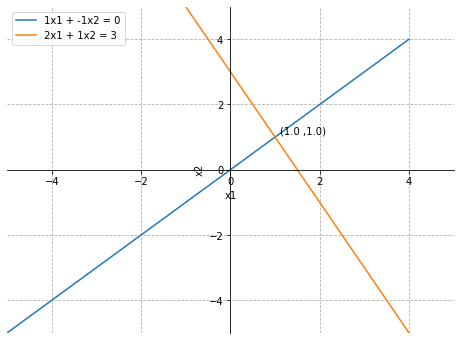

In [9]:
plot_([[ 1,-1,0],[2,1,3]],-5,5)

### plot from 2 points

In [10]:
def plot_from_point(P0, P1,ub,lb):
    x = np.array(range(ub,lb))
    fig, ax = plt.subplots(figsize=(8,6))
    plt.axis([ub, lb, ub, lb])
    x1, y1 = P0[0], P0[1]
    x2, y2 = P1[0], P1[1]    
    num = y2 - y1
    den = x2 - x1
    if num == 0:
        y = y1
        
    
    elif den == 0:
        x = x1
    
    else:
        slope = num/den
        y = slope * (x - x1) + y1
        ax.plot(x,y)
    
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.grid(linestyle='--')
    print('slope: ',slope)
    print('coefficient of x2: {}, x1: {}, c: {}'.format(1,-slope, -slope*x1+y1))


slope:  0.8
coefficient of x2: 1, x1: -0.8, c: -1.2000000000000002


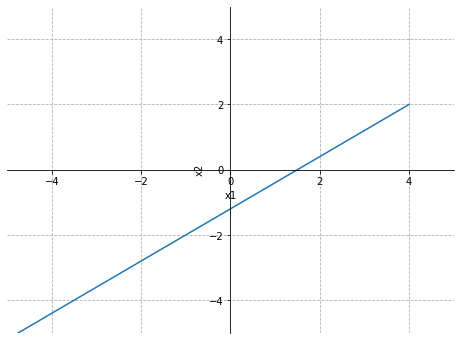

In [14]:
plot_from_point((9,6),(4,2),-5,5)